

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


<h3>Introduction to the dataset</h3>
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue

<h2>My questions</h2>
<ol>
    <li>the average run time of all the movies</li>
    <li>which movie has the highest revenue</li>
    <li>are the movie's revenues increase or decrease over time?</li>
    <li>which movie has the highest budget</li>
    <li>Are the movie's budgets increase or decrease over time</li>
</ol>

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [29]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [31]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [32]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [33]:
df.shape

(10866, 21)

In [34]:
sum(df.duplicated())
# We have one duplicated row
        

1



### Data Cleaning (in this section i will clean the data and i will explain each code cell with a markDown cell starting from here .. the cell below this one is to delete the duplicated data )

In [35]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop_duplicates(inplace=True)
# here we deleted the duplicated row


In [36]:
#we replaced the 0s in the run time with the mean so we can get the fair mean of run time of all the movies
mean_runTime = df['runtime'].mean()
df['runtime'] =df['runtime'].replace(0, mean_runTime)


<h5>Here I am going to delete the unused columns so it would look cleaner and easier to read</h5>
<ol>
    <li>Id</li>
    <li>popularity</li>
    <li>budget</li>
    <li>revenue</li>
    <li>original title</li>
    <li>run time</li>
    <li>release year</li>
    </ol>


In [37]:
#in the list below are all un-used columns
unused = ['imdb_id' , 'cast' , 'homepage' , 'director' , 'tagline' , 'keywords' , 'overview' , 'genres' , 'production_companies',
         'release_date' , 'vote_count','vote_average', 'budget_adj' , 'revenue_adj']

df.drop(unused , 1 , inplace=True)

df.head()


,id,popularity,budget,revenue,original_title,runtime,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124.0,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120.0,2015
2,262500,13.112507,110000000,295238201,Insurgent,119.0,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136.0,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137.0,2015


In [38]:

df.head()

,id,popularity,budget,revenue,original_title,runtime,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124.0,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120.0,2015
2,262500,13.112507,110000000,295238201,Insurgent,119.0,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136.0,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137.0,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (the average run time of all the movies )

In [39]:

df['runtime'].mean()

102.36302121442318

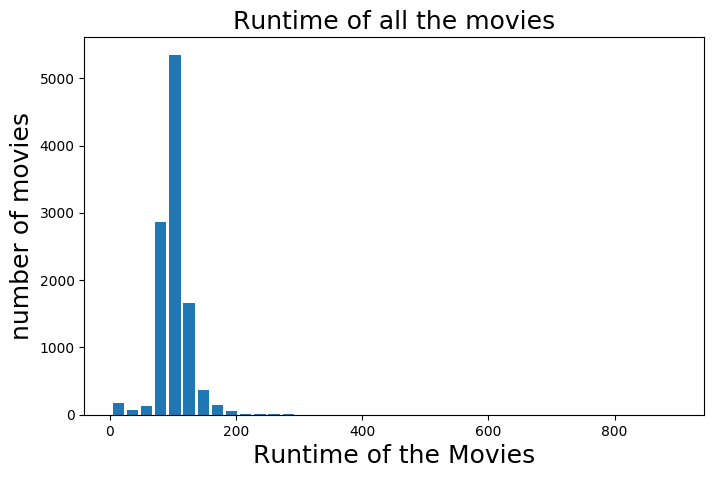

In [40]:
#plotting a histogram of runtime of all the movies


plt.figure(figsize=(8,5), dpi = 100)

# the X label
plt.xlabel('Runtime of the Movies', fontsize = 18)
# the Y label
plt.ylabel('number of movies', fontsize=18)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=18)


plt.hist(df['runtime'], rwidth = 0.8, bins =40)
#displays the plot
plt.show()

<h3>We see that the majority of movies are centered around 90 to 140 which falls in the average time we got. And it looks like the graph is skewed right </h3>


### Research Question 2 (which movie has the highest revenue )

In [41]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#here we get the id of the movie that has the highest revenue
df['revenue'].idxmax()

1386

In [42]:
#here is the data of the movie that has the highest revenue
print(df.loc[[1386]])

         id  popularity     budget     revenue original_title  runtime  \
1386  19995    9.432768  237000000  2781505847         Avatar    162.0   

      release_year  
1386          2009  


### Research Question 3  (which movie has the highest budget)

In [43]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['budget'].idxmax()


2244

In [44]:
print(df.loc[[2244]])

         id  popularity     budget   revenue     original_title  runtime  \
2244  46528     0.25054  425000000  11087569  The Warrior's Way    100.0   

      release_year  
2244          2010  


### Research Question 4 (Are the movie's revenues increase or decrease over time)

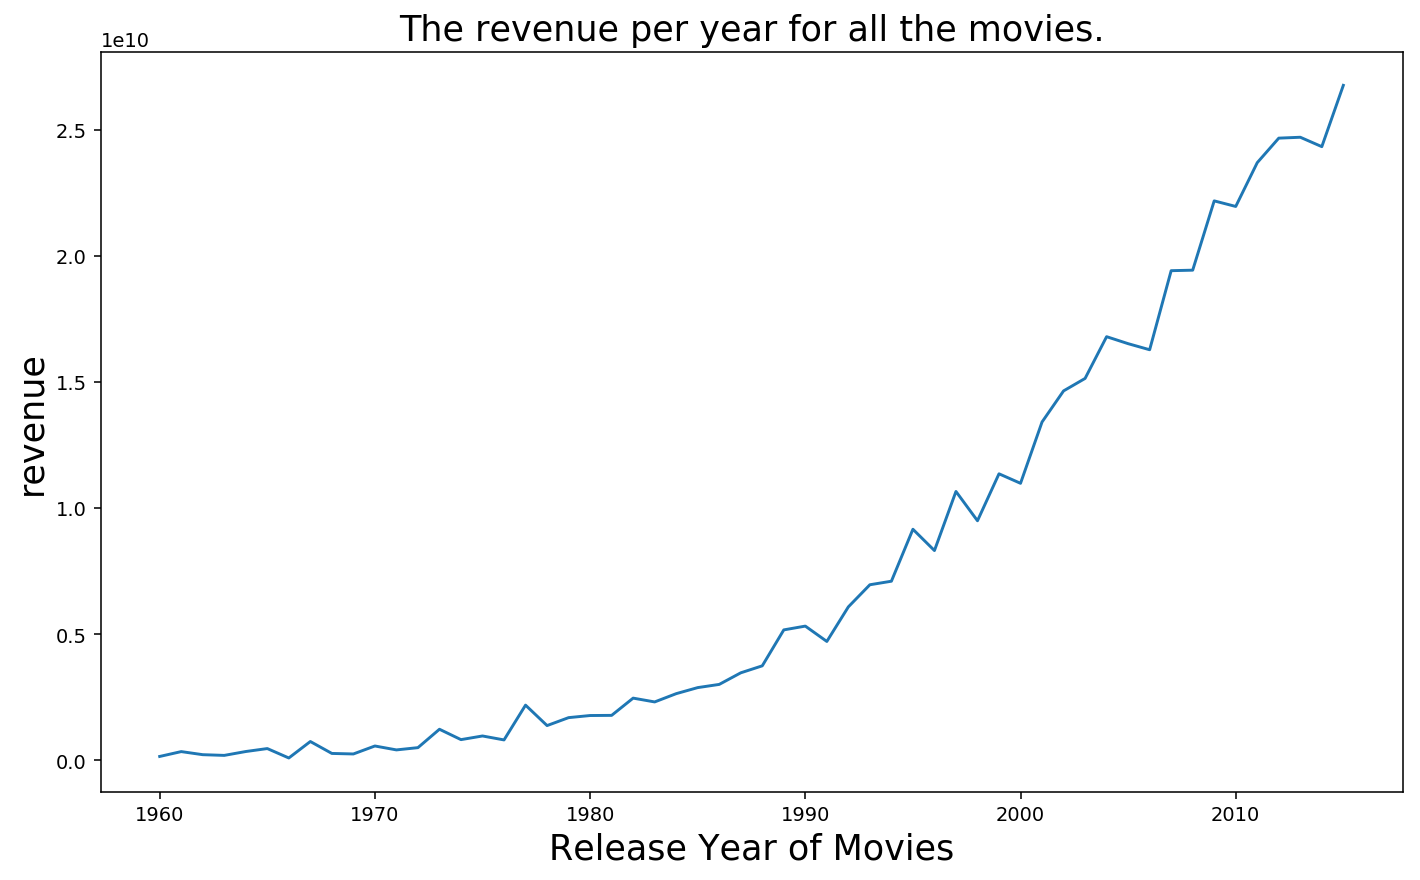

In [45]:

revenue_per_year = df.groupby('release_year')['revenue'].sum()

plt.figure(figsize = (12,7), dpi = 140)
# the X label
plt.xlabel('Release Year of Movies', fontsize = 18)
# the Y label
plt.ylabel('revenue', fontsize = 18)
# The name of the graph
plt.title('The revenue per year for all the movies.' , fontsize = 18)

plt.plot(revenue_per_year)

plt.show();

<h2>From the line plot we see that the revenue goes up every year </h2>

### Research Question 4 (Are the movie's budgets increase or decrease over time)

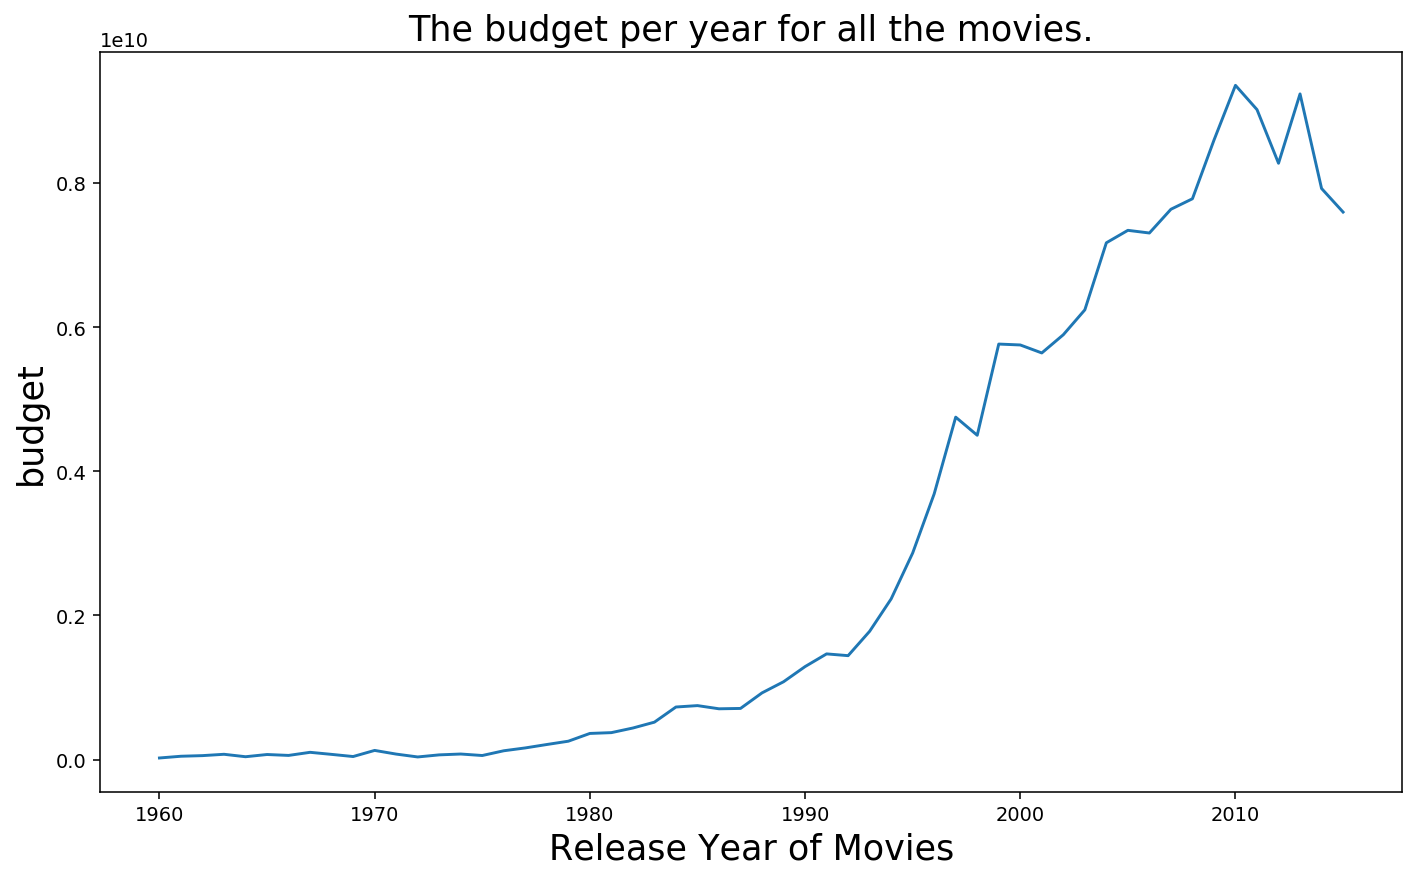

In [46]:

budget_per_year = df.groupby('release_year')['budget'].sum()

plt.figure(figsize = (12,7), dpi = 140)
# the X label
plt.xlabel('Release Year of Movies', fontsize = 18)
# the Y label
plt.ylabel('budget', fontsize = 18)
# The name of the graph
plt.title('The budget per year for all the movies.' , fontsize = 18)

plt.plot(budget_per_year)

plt.show();

<p>as we can see from the begging year of the dataset we see that the budget been goning up till recent year. And 2010 is the year with the most spent budget</p>

<h3>Exploring the data a bit furthur</h3>

In [47]:
df['budget'].mean()

14624286.06433502

In [48]:
df['runtime'].mean()

102.36302121442318

<a id='conclusions'></a>

<h2>Limitations</h2>
<ul>
    <li>personlly I am studing in college know .. so I did not have enough time to do a perfect job</li>
    <li>In the long run I could face a dataset with limited resourses e.g. alot of duplicated rows, or alot of missing rows </li>
    <li>the lack of supporting material</li>
    <li>if the subject of the project Was not intersting I could lack enthusiasm</li>
</ul>
        
        
## Conclusions


<ol>
    <li>we discovered that the majority of all the movies are between 90 to 140</li>
    <li>the movie that has the highest revenue is avatar with id = 1386</li>
    <li>the movie with the highest budget is The Warrior's Way </li>
    <li>We also dicovered that movies revenues increase over time</li>
    <li>We know that the budget been increasing until 2010 then it started to go down</li>
    </ol>


        
<h5>Resourses</h5>
<ol>
    <li>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/text.html</li>
    <li>http://pandas.pydata.org/pandas-docs/stable/groupby.html</li>
    </ol>

## Submitting your Project 



In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0